# Homework Set 4
## Carlos Lizama

This home work is an extension of homework 1, but this time in Python. The aim is to show the downward bias of the OLS estimator of an AR(1) process. Given the following equation  
\begin{equation}
X_{t+1} = \alpha X_t + \beta + \sigma W_{t+1}, \quad   \{ W_{t} \} \sim N(0,1) 
\end{equation}

I estimate $\alpha$ using different same sizes and then I plot the bias against the sample size

I start the code importing all the necessary packages

In [5]:
# Carlos Lizama
# Homework Set 4

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

Then I define the main function that is going to do all the job.

In [6]:
@jit
def estimate_bias(alphas,beta,sigma,ns,J):
# alpha is an array with all alpha's and ns is and array with all n's.
# the time series are generated for all alpha at once, to make it faster. I tried looping over alpha and it takes 
# too long.
# J is the number of observations of the estimate for a given pair (alpha,n)
# beta and sigma are parameters of the process, set by me.

    na = len(alphas)           # number of alpha's 
    N = len(ns)                # number of n's
    vbeta = beta*np.ones(na)   # vector of beta
    E = np.empty((na,N))       # matrix where each estimate for pair (alpha,n) will be saved

    for i in range(N):
        n = ns[i]
        En = np.empty((na,J))  # in this array I save the estimate of each of the T observations, given n.

        for j in range(J):
            x = np.empty((na,n))
            x[:,0] = beta/(1-alphas)*np.ones(na)

            for t in range(n-1):               # generate the time series, given n, for all alphas.
                x[:,t+1] = alphas*x[:,t] + vbeta + sigma*np.random.randn(na)

            for a in range(na):
                En[a,j] = stats.linregress(x[a,0:n-1],x[a,1:n])[0]    # estimate and obtain the slope

        for a in range(na):
            E[a,i] = En[a,:].mean()-alphas[a]

    return E                   

Finally, I define the parameter, call the function and plot the graph


CPU times: user 9min 20s, sys: 168 ms, total: 9min 20s
Wall time: 10min 32s


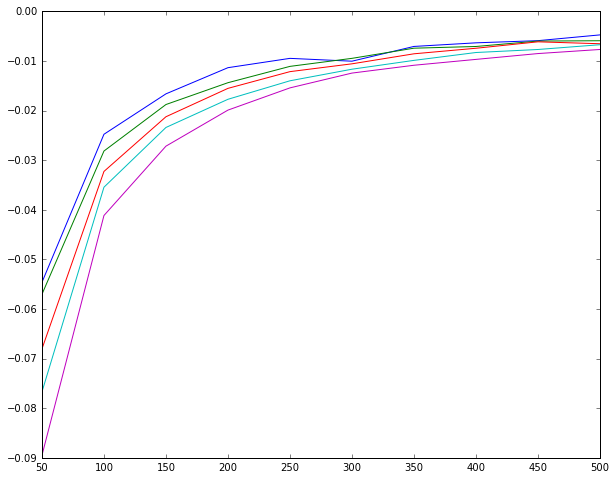

In [7]:
# Parameters
alphas = np.array([0.5, 0.6, 0.7, 0.8, 0.9])
beta = 1                           # it is not specified in the homework. It is chosen by me.
sigma = 1                          # again, not specified. Set by me.
ns = np.arange(50,501,50)          # Set possible values for n
N = 10000

# call the function
%time results = estimate_bias(alphas,beta,sigma,ns,N)

# plot
plt.figure(figsize=(10, 8))
for a in range(len(alphas)):
    plt.plot(ns,results[a,:])